<a href="https://colab.research.google.com/github/Keshavkant/Yolo/blob/master/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv3 on Thermal Images
# Clone the repository

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13100, done.
remote: Total 13100 (delta 0), reused 0 (delta 0), pack-reused 13100
Receiving objects: 100% (13100/13100), 11.86 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (8953/8953), done.


In [0]:
from pylab import *


# Configure Makefile to build using GPU and CUDNN 
```sed``` means stream-editor. 

It replaces a particular matching text with another. In this case we make 

```
OPENCV=1
GPU=1
CUDNN=1
```

In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

# To check CUDA version
You can also use ```nvidia-smi```

In [4]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Wed Apr 22 04:35:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+

# Build the Darknet Model

```make -jX```

X means how many CPU cores to use in parallel. We make it faster with 32 jobs at a time

In [5]:
!make -j32 

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -

# Mount Google Drive

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Create a 'symbolic link'

Since it is tedious to write ```/content/gdrive/My\ Drive/```

We create a link to just write ```/mydrive```

In [7]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 2020-01-21-16-54-28.ba   images		    yolov3
'Colab Notebooks'	  Resume_16bec079.pdf	    Yolov3
'Copy of obj.names'	  Untitled0.ipynb
'Getting started.pdf'	  VID_20200314_160120.mp4


# Unzip directly from location to darknet/data

In [8]:
!unzip /mydrive/yolov3/obj.zip -d darknet/data/

Archive:  /mydrive/yolov3/obj.zip
  inflating: darknet/data/obj/002c4e3ca35ff9f2.jpg  
  inflating: darknet/data/obj/002c4e3ca35ff9f2.txt  
  inflating: darknet/data/obj/0030a802df47b2c8.jpg  
  inflating: darknet/data/obj/0030a802df47b2c8.txt  
  inflating: darknet/data/obj/007af517cde18beb.jpg  
  inflating: darknet/data/obj/007af517cde18beb.txt  
  inflating: darknet/data/obj/0166bfe6cfa084f9.jpg  
  inflating: darknet/data/obj/0166bfe6cfa084f9.txt  
  inflating: darknet/data/obj/01be612e619d1fab.jpg  
  inflating: darknet/data/obj/01be612e619d1fab.txt  
  inflating: darknet/data/obj/01dd6c025c5a2696.jpg  
  inflating: darknet/data/obj/01dd6c025c5a2696.txt  
  inflating: darknet/data/obj/01f05b06e9eebb68.jpg  
  inflating: darknet/data/obj/01f05b06e9eebb68.txt  
  inflating: darknet/data/obj/028202a4f4fd23b6.jpg  
  inflating: darknet/data/obj/028202a4f4fd23b6.txt  
  inflating: darknet/data/obj/02e718b2cd1c01ee.jpg  
  inflating: darknet/data/obj/02e718b2cd1c01ee.txt  
  inflating:

In [0]:
!cp /mydrive/yolov3/obj.zip ../

# Create a copy of config to do your own work

Original stored in drive. Copied to darknet/cfg

yolov3_custom.cfg is for TESTING only

In [0]:
!cp /mydrive/yolov3/yolov3_custom.cfg darknet/cfg

In [0]:
!cp /mydrive/yolov3/obj.names ./darknet/data
!cp /mydrive/yolov3/obj.data  ./darknet/data

In [0]:
# Run this cell ONLY if you want to make changes to obj.data
# It will move it to your drive
# !mv obj.data /mydrive/yolov3/obj.data
# !mv yolov3_custom.cfg darknet/cfg/

# Create a LIST of filenames which are in ```darknet/data/obj``` directory

Copy file from drive to root directory

In [0]:
!cp /mydrive/yolov3/generate_train.py ./
# Need not provide any arguments. It automatically goes to darknet/data/obj
!python generate_train.py 

# Download Model

In [0]:
# !wget http://pjreddie.com/media/files/darknet53.conv.74

# Train the model using your config?

In [0]:
# !./darknet/darknet detector train darknet/data/obj.data darknet/cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show 
#> train_dump.txt 2>&1

In [0]:
# !./darknet/darknet detector train darknet/data/obj.data darknet/cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [0]:
!sed -i 's/batch=64/batch=1/' darknet/cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' darknet/cfg/yolov3_custom.cfg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

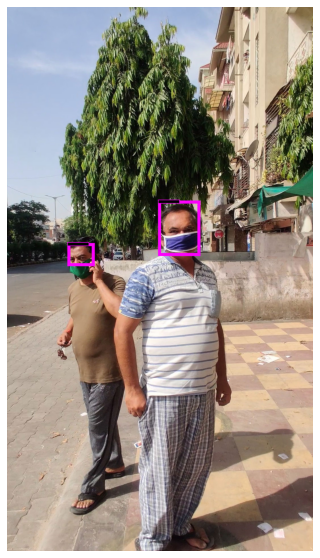

In [21]:
!./darknet/darknet detector test darknet/data/obj.data darknet/cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/RGBFACE1.jpg -thresh 0.3 -dont_show
imShow('predictions.jpg')
